MUH MAGIC

In [1]:
%reset -f
%load_ext blackcellmagic
%load_ext line_profiler
def printf(fmt,*args):
	print(fmt % (args), end="")

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json
from statsmodels.tsa.stattools import adfuller, acf, pacf
pd.set_option('display.max_rows', 120)
plt.style.use("ggplot")

In [7]:
!ls adfuller/adf_results/

result001.json	result006.json	result011.json	result016.json	result021.json
result002.json	result007.json	result012.json	result017.json	result022.json
result003.json	result008.json	result013.json	result018.json	result023.json
result004.json	result009.json	result014.json	result019.json	result024.json
result005.json	result010.json	result015.json	result020.json


Open a dicky fuller results from a lag of one

In [8]:
dful_results = None
with open("adfuller/adf_results/result001.json") as f:
    dful_results = json.load(f)
    display(pd.DataFrame(dful_results).head())
    

adfuller_results
0  {'SizeRank': 1, 'TestStatistic': -1.5650165270...
1  {'SizeRank': 2, 'TestStatistic': -3.5280363372...
2  {'SizeRank': 3, 'TestStatistic': -2.0509069719...
3  {'SizeRank': 4, 'TestStatistic': -1.3222230695...
4  {'SizeRank': 5, 'TestStatistic': -3.2858540298...

In [9]:
dful_results.keys()

dict_keys(['adfuller_results'])

Cycle through all diffed logged lags 1-24 and adfuller pvales < .05

In [10]:
significant_dful_p_values = {}
for lag in range(1,24):
    significant_pvalues = []
    dful_results = None
    with open("adfuller/adf_results/result%03d.json"%lag) as f:
        dful_results = json.load(f)
    for obs in dful_results["adfuller_results"]:
        try:
            if obs["PValue"] > .05:
                continue
            significant_pvalues.append(obs)
        except:
            continue
    significant_dful_p_values["%03d"%lag] = significant_pvalues

pretty print Significant Pvalues

In [11]:
pd.DataFrame(significant_dful_p_values["001"]).head()

LagsUsed  NumberofObservationsUsed    PValue  SizeRank  TestStatistic  \
0         3                        71  0.007296         2      -3.528036   
1         6                        68  0.015523         5      -3.285854   
2        11                        63  0.000208         7      -4.486878   
3         4                        70  0.045297         9      -2.900437   
4        11                        63  0.015445        11      -3.287530   

                                         threshholds  
0  {'1%': -3.526004646825607, '5%': -2.9032002348...  
1  {'1%': -3.530398990560757, '5%': -2.9050874099...  
2  {'1%': -3.5386953618719676, '5%': -2.908644675...  
3  {'1%': -3.5274258688046647, '5%': -2.903810816...  
4  {'1%': -3.5386953618719676, '5%': -2.908644675...

In [12]:
!ls

adfuller	 first_ten.pdf	README.md	      Untitled.ipynb
CONTRIBUTING.md  images		scratch2.ipynb	      view_data.py
df_09.csv	 index.ipynb	scratch.ipynb	      zillow_data.csv
df_2012.csv	 LICENSE.md	sig_dful_pv_plots
first_50.pdf	 logdifflag	sig_dful_pv_plots.py


Get the relevant zipcode for anaysis for the given lags 

Lets take a look at the first row of data for each logged lag of N 

In [13]:
for lag in range(1,25):
    temp = pd.read_csv("logdifflag/loglags/09_loglagof%03d.csv" % lag, low_memory=True)
#     display(temp.iloc[:, 8+lag:].iloc[:1])
    display(temp.iloc[:1])

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN            13.511293            -0.005437         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.006385             0.001987             0.000298   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.001784             0.003658             0.005315   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0              0.00558             0.006131             0.003003   

   2018-04-01 00:00:00  
0              -0.0031  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN            13.505855         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.014223             0.008372             0.002285   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.002082             0.005443             0.008973   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.010895             0.011711             0.009134   

   2018-04-01 00:00:00  
0            -0.000097  

[1 rows x 84 columns]

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.016344              0.01621              0.00867   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.004069              0.00574             0.010758   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.014553             0.017026             0.014714   

   2018-04-01 00:00:00  
0             0.006034  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.014223             0.018331             0.016508   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.010455             0.007727             0.011055   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.016337             0.020684             0.020029   

   2018-04-01 00:00:00  
0             0.011614  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.011805              0.01621             0.018628   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.018292             0.014113             0.013042   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.016635             0.022468             0.023687   

   2018-04-01 00:00:00  
0             0.016929  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.008489             0.013792             0.016508   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.020413              0.02195             0.019428   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.018622             0.022766             0.025472   

   2018-04-01 00:00:00  
0             0.020587  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.006786             0.010477              0.01409   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.018292             0.024071             0.027265   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.025007             0.024753             0.025769   

   2018-04-01 00:00:00  
0             0.022371  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.010799             0.008773             0.010774   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.015874              0.02195             0.029386   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.032845             0.031139             0.027756   

   2018-04-01 00:00:00  
0             0.022669  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.017558             0.012786             0.009071   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.012559             0.019532             0.027265   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.034966             0.038976             0.034142   

   2018-04-01 00:00:00  
0             0.024656  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.024872             0.019545             0.013084   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.010855             0.016217             0.024847   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.032845             0.041097             0.041979   

   2018-04-01 00:00:00  
0             0.031042  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.031521             0.026859             0.019842   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.014868             0.014513             0.021532   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.030427             0.038976               0.0441   

   2018-04-01 00:00:00  
0             0.038879  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.033267             0.033508             0.027156   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.021627             0.018526             0.019828   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.027112             0.036558             0.041979   

   2018-04-01 00:00:00  
0                0.041  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0              0.03111             0.035254             0.033806   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.028941             0.025285             0.023841   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.025408             0.033243             0.039561   

   2018-04-01 00:00:00  
0             0.038879  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.031932             0.033098             0.035552   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0              0.03559             0.032599               0.0306   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.029421             0.031539             0.036246   

   2018-04-01 00:00:00  
0             0.036461  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.035532             0.033919             0.033395   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.037337             0.039248             0.037914   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0              0.03618             0.035552             0.034542   

   2018-04-01 00:00:00  
0             0.033146  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.039869             0.037519             0.034216   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0              0.03518             0.040995             0.044563   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.043494             0.042311             0.038555   

   2018-04-01 00:00:00  
0             0.031442  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.047766             0.041856             0.037817   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.036001             0.038838              0.04631   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.050143             0.049625             0.045314   

   2018-04-01 00:00:00  
0             0.035455  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0              0.05415             0.049753             0.042154   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.039601             0.039659             0.044153   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.051889             0.056274             0.052628   

   2018-04-01 00:00:00  
0             0.042214  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.055726             0.056137             0.050051   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.043939             0.043259             0.044974   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.049733             0.058021             0.059277   

   2018-04-01 00:00:00  
0             0.049528  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.058675             0.057713             0.056435   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.051836             0.047597             0.048574   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.050554             0.055864             0.061024   

   2018-04-01 00:00:00  
0             0.056177  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0              0.07045             0.060662             0.058011   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.058219             0.055494             0.052912   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.054154             0.056685             0.058867   

   2018-04-01 00:00:00  
0             0.057924  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.082582             0.072437              0.06096   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.059795             0.061878             0.060809   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.058492             0.060285             0.059688   

   2018-04-01 00:00:00  
0             0.055767  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0             0.089084             0.084569             0.072735   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.062744             0.063454             0.067192   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.066388             0.064623             0.063288   

   2018-04-01 00:00:00  
0             0.056588  

[1 rows x 84 columns]

Unnamed: 0  RegionID  RegionName     City State    Metro CountyName  \
0           0     84654       60657  Chicago    IL  Chicago       Cook   

   SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00         ...           \
0       NaN                  NaN                  NaN         ...            

   2017-07-01 00:00:00  2017-08-01 00:00:00  2017-09-01 00:00:00  \
0              0.09137             0.091071             0.084867   

   2017-10-01 00:00:00  2017-11-01 00:00:00  2017-12-01 00:00:00  \
0             0.074519             0.066402             0.068769   

   2018-01-01 00:00:00  2018-02-01 00:00:00  2018-03-01 00:00:00  \
0             0.072772              0.07252             0.067626   

   2018-04-01 00:00:00  
0             0.060188  

[1 rows x 84 columns]

count of the stationary variables we can observe from each lag

In [14]:
for k in significant_dful_p_values:
    print("lag %s" % k,len(significant_dful_p_values[k]))

lag 001 7718
lag 002 5682
lag 003 2504
lag 004 5633
lag 005 4102
lag 006 3876
lag 007 4499
lag 008 3656
lag 009 2993
lag 010 4182
lag 011 2246
lag 012 3869
lag 013 3281
lag 014 5163
lag 015 4735
lag 016 4490
lag 017 4141
lag 018 3832
lag 019 3468
lag 020 3273
lag 021 3034
lag 022 2751
lag 023 2536


lets plot the rows from our data frame where we can observe stationarity

<img src="./sig_dful_pv_plots/001.png"></img>
<img src="./sig_dful_pv_plots/002.png"></img>
<img src="./sig_dful_pv_plots/003.png"></img>
<img src="./sig_dful_pv_plots/004.png"></img>
<img src="./sig_dful_pv_plots/005.png"></img>
<img src="./sig_dful_pv_plots/006.png"></img>
<img src="./sig_dful_pv_plots/007.png"></img>
<img src="./sig_dful_pv_plots/010.png"></img>
<img src="./sig_dful_pv_plots/011.png"></img>
<img src="./sig_dful_pv_plots/012.png"></img>
<img src="./sig_dful_pv_plots/013.png"></img>
<img src="./sig_dful_pv_plots/014.png"></img>
<img src="./sig_dful_pv_plots/015.png"></img>
<img src="./sig_dful_pv_plots/016.png"></img>
<img src="./sig_dful_pv_plots/017.png"></img>
<img src="./sig_dful_pv_plots/020.png"></img>
<img src="./sig_dful_pv_plots/021.png"></img>


In [15]:
def get_pvalue_df(lag):
    significant_pvalues = []
    dful_results = None
    with open("adfuller/adf_results/result%03d.json" % lag) as f:
        dful_results = json.load(f)
    for obs in dful_results["adfuller_results"]:
        try:
            if obs["PValue"] > 0.05:
                continue
            significant_pvalues.append(obs)
        except:
            continue
    return pd.DataFrame(significant_pvalues, dtype=np.float64)



In [16]:
def replace_strwnan(s):
    try:
        result = float(s)
        return result
    except:
        return np.nan


In [17]:
def get_predictable_laglogdf(lag):
    lag_log_dfn = pd.read_csv(
        "logdifflag/loglags/09_loglagof%03d.csv" % lag, low_memory=False
    )
    pvalue_df = get_pvalue_df(lag)
    significant_lag_log_dfn = lag_log_dfn.loc[pvalue_df["SizeRank"]]
    return significant_lag_log_dfn

In [18]:
lags = 24
predictable_zips = set(get_predictable_laglogdf(1)["RegionID"])
for lag in range(2, lags + 1):
    predictable_zips_lag = set(get_predictable_laglogdf(lag)["RegionID"])
    predictable_zips = predictable_zips.intersection(predictable_zips_lag)
predictable_zips

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


{58909,
 60830,
 60850,
 62907,
 64550,
 70817,
 71196,
 74775,
 79196,
 84854,
 92549,
 94849,
 95928,
 97758,
 98413,
 99252,
 99961}

In [19]:
predictable_zips = list(map(lambda x: str(x), predictable_zips))

In [20]:
df = pd.read_csv("df_2012.csv")
df_ts = df.iloc[:, 7:].T

In [21]:
display(df.head())
display(df_ts.head())

Unnamed: 0  RegionID  RegionName      City State              Metro  \
0           0     84654       60657   Chicago    IL            Chicago   
1           1     90668       75070  McKinney    TX  Dallas-Fort Worth   
2           2     91982       77494      Katy    TX            Houston   
3           3     84616       60614   Chicago    IL            Chicago   
4           4     93144       79936   El Paso    TX            El Paso   

  CountyName  SizeRank  2012-01-01 00:00:00  2012-02-01 00:00:00  \
0       Cook         1             737700.0             733700.0   
1     Collin         2             199600.0             200100.0   
2     Harris         3             248600.0             251600.0   
3       Cook         4             928900.0             923900.0   
4    El Paso         5             112400.0             112200.0   

          ...           2017-07-01 00:00:00  2017-08-01 00:00:00  \
0         ...                     1005500.0            1007500.0   
1         ...                      308000.0             310000.0   
2         ...                      321000.0             320600.0   
3         ...                     1289800.0            1287700.0   
4         ...                      119100.0             119400.0   

   2017-09-01 00:00:00  2017-10-01 00:00:00  2017-11-01 00:00:00  \
0            1007800.0            1009600.0            1013300.0   
1             312500.0             314100.0             315000.0   
2             320200.0             320400.0             320800.0   
3            1287400.0            1291500.0            1296600.0   
4             120000.0             120300.0             120300.0   

   2017-12-01 00:00:00  2018-01-01 00:00:00  2018-02-01 00:00:00  \
0            1018700.0            1024400.0            1030700.0   
1             316600.0             318100.0             319600.0   
2             321200.0             321200.0             323000.0   
3            1299000.0            1302700.0            1306400.0   
4             120300.0             120300.0             120500.0   

   2018-03-01 00:00:00  2018-04-01 00:00:00  
0            1033800.0            1030600.0  
1             321100.0             321800.0  
2             326900.0             329900.0  
3            1308500.0            1307000.0  
4             121000.0             121500.0  

[5 rows x 84 columns]

0         1         2         3         4      \
SizeRank                  1.0       2.0       3.0       4.0       5.0   
2012-01-01 00:00:00  737700.0  199600.0  248600.0  928900.0  112400.0   
2012-02-01 00:00:00  733700.0  200100.0  251600.0  923900.0  112200.0   
2012-03-01 00:00:00  734000.0  200700.0  252800.0  925300.0  112400.0   
2012-04-01 00:00:00  740300.0  201800.0  252400.0  938100.0  112800.0   

                        5         6         7         8          9      \
SizeRank                  6.0       7.0       8.0       9.0       10.0   
2012-01-01 00:00:00  113200.0  306400.0  565300.0  116000.0  2244700.0   
2012-02-01 00:00:00  112800.0  301300.0  555400.0  115900.0  2261100.0   
2012-03-01 00:00:00  112600.0  298300.0  549300.0  115800.0  2276900.0   
2012-04-01 00:00:00  112000.0  295200.0  552400.0  115200.0  2303700.0   

                       ...        14713     14714     14715     14716  \
SizeRank               ...      14714.0   14715.0   14716.0   14717.0   
2012-01-01 00:00:00    ...     115000.0  196200.0  151400.0  230600.0   
2012-02-01 00:00:00    ...     114500.0  195000.0  150000.0  232700.0   
2012-03-01 00:00:00    ...     114400.0  194700.0  149600.0  240200.0   
2012-04-01 00:00:00    ...     113500.0  195800.0  149100.0  247800.0   

                        14717     14718     14719     14720     14721  \
SizeRank              14718.0   14719.0   14720.0   14721.0   14722.0   
2012-01-01 00:00:00  121400.0  174600.0  185300.0  107100.0  513300.0   
2012-02-01 00:00:00  121800.0  174700.0  186600.0  107700.0  511700.0   
2012-03-01 00:00:00  121500.0  175200.0  187100.0  108900.0  507700.0   
2012-04-01 00:00:00  121000.0  175400.0  184700.0  109600.0  503700.0   

                        14722  
SizeRank              14723.0  
2012-01-01 00:00:00  197600.0  
2012-02-01 00:00:00  198400.0  
2012-03-01 00:00:00  199100.0  
2012-04-01 00:00:00  199500.0  

[5 rows x 14723 columns]

In [22]:
predictable_zips = pd.DataFrame(list(map(lambda x: str(x), predictable_zips)), columns=["RegionID"])
predictable_zips

RegionID
0     94849
1     70817
2     79196
3     92549
4     64550
5     97758
6     98413
7     60850
8     99252
9     84854
10    74775
11    95928
12    99961
13    62907
14    71196
15    58909
16    60830

In [23]:
df["RegionID"] = df["RegionID"].astype(str)
df.index = df["RegionID"]
predictable_zips["RegionID"] = predictable_zips["RegionID"].astype(str)

In [24]:
predictable_df = df.loc[predictable_zips["RegionID"]]

In [25]:
predictable_df

Unnamed: 0 RegionID  RegionName            City State  \
RegionID                                                          
94849           2212    94849       85257      Scottsdale    AZ   
70817            842    70817       30032  Candler-Mcafee    GA   
79196           1967    79196       48423         Davison    MI   
92549           6709    92549       78611          Burnet    TX   
64550           3207    64550       16335       Meadville    PA   
97758           2029    97758       94551       Livermore    CA   
98413            346    98413       95758       Elk Grove    CA   
60850           5719    60850        7871          Sparta    NJ   
99252            285    99252       97402          Eugene    OR   
84854           4390    84854       61244     East Moline    IL   
74775           6364    74775       38343        Humboldt    TN   
95928           7325    95928       89460    Gardnerville    NV   
99961            380    99961       98682       Vancouver    WA   
62907           7509    62907       13032           Lenox    NY   
71196           4700    71196       30549       Jefferson    GA   
58909           6605    58909        2806      Barrington    RI   
60830           7882    60830        7843       Hopatcong    NJ   

                         Metro   CountyName  SizeRank  2012-01-01 00:00:00  \
RegionID                                                                     
94849                  Phoenix     Maricopa      2213             159800.0   
70817                  Atlanta       Dekalb       843                  NaN   
79196                    Flint      Genesee      1968              86300.0   
92549                      NaN       Burnet      6710             140400.0   
64550                Meadville     Crawford      3208              80600.0   
97758            San Francisco      Alameda      2030             363600.0   
98413               Sacramento   Sacramento       347             188200.0   
60850                 New York       Sussex      5720             314900.0   
99252                   Eugene         Lane       286             145300.0   
84854                Davenport  Rock Island      4391              83600.0   
74775                      NaN       Gibson      6365              68500.0   
95928     Gardnerville Ranchos      Douglas      7326             175800.0   
99961                 Portland        Clark       381             158100.0   
62907                 Syracuse      Madison      7510              92500.0   
71196                Jefferson      Jackson      4701             108600.0   
58909               Providence      Bristol      6606             325100.0   
60830                 New York       Sussex      7883             192000.0   

          2012-02-01 00:00:00         ...           2017-07-01 00:00:00  \
RegionID                              ...                                 
94849                160900.0         ...                      303200.0   
70817                     NaN         ...                      103300.0   
79196                 86600.0         ...                      142200.0   
92549                140200.0         ...                      159100.0   
64550                 80600.0         ...                       88100.0   
97758                365700.0         ...                      706000.0   
98413                188400.0         ...                      373600.0   
60850                313100.0         ...                      331500.0   
99252                144800.0         ...                      226300.0   
84854                 83200.0         ...                       86700.0   
74775                 68400.0         ...                       72000.0   
95928                175000.0         ...                      293100.0   
99961                157700.0         ...                      286400.0   
62907                 92400.0         ...                      106800.0   
71196                110200.0         ...            

In [50]:
predictable_df_ts = predictable_df.iloc[:, 8:].T

In [57]:
import datetime
import time
def to_posix(date):
#     print("".join(date.split(" ")[:-1]))
    dt = datetime.datetime.strptime("".join(date.split(" ")[:-1]), "%Y-%m-%d")
    posix_dt = time.mktime(dt.timetuple())
    return posix_dt

def from_posix(psx):
    return time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(psx))

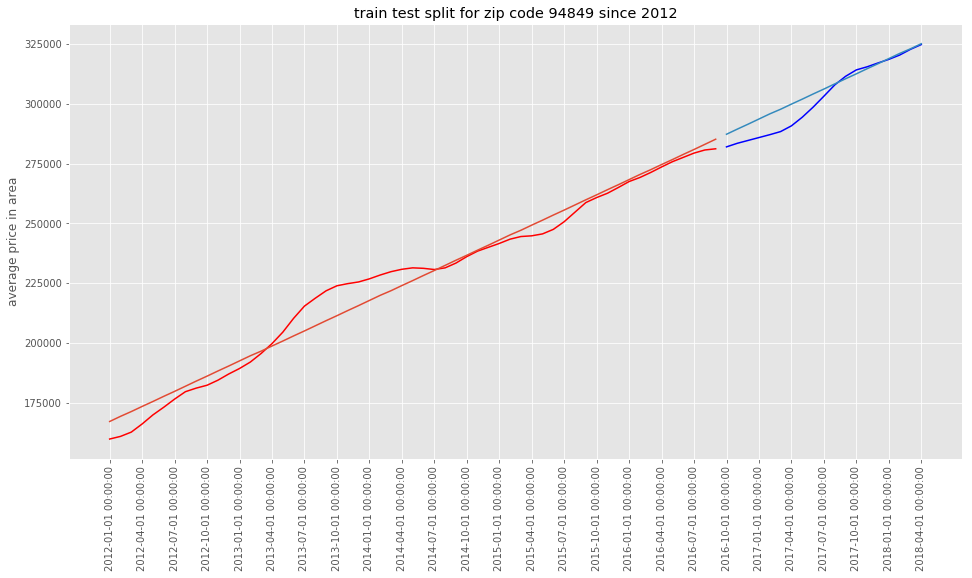

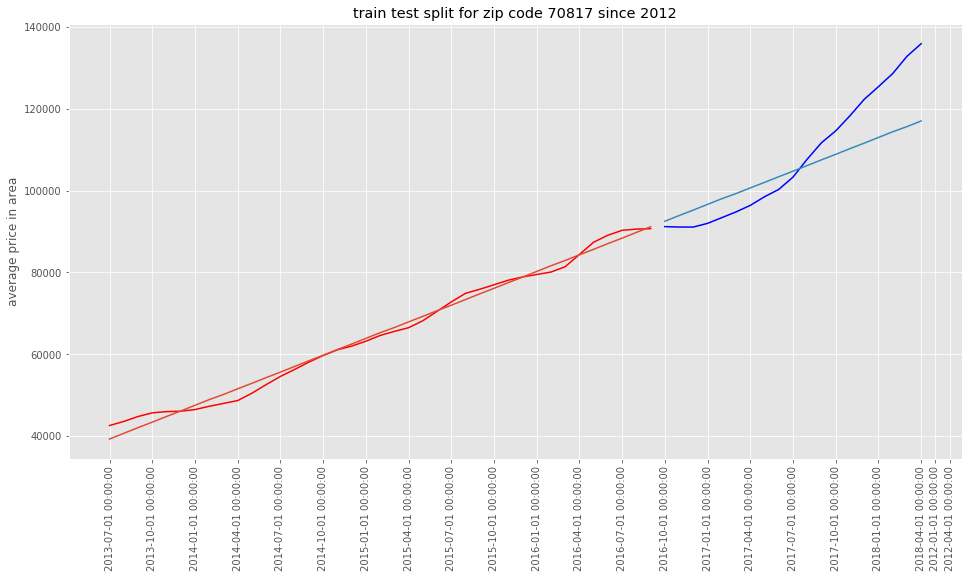

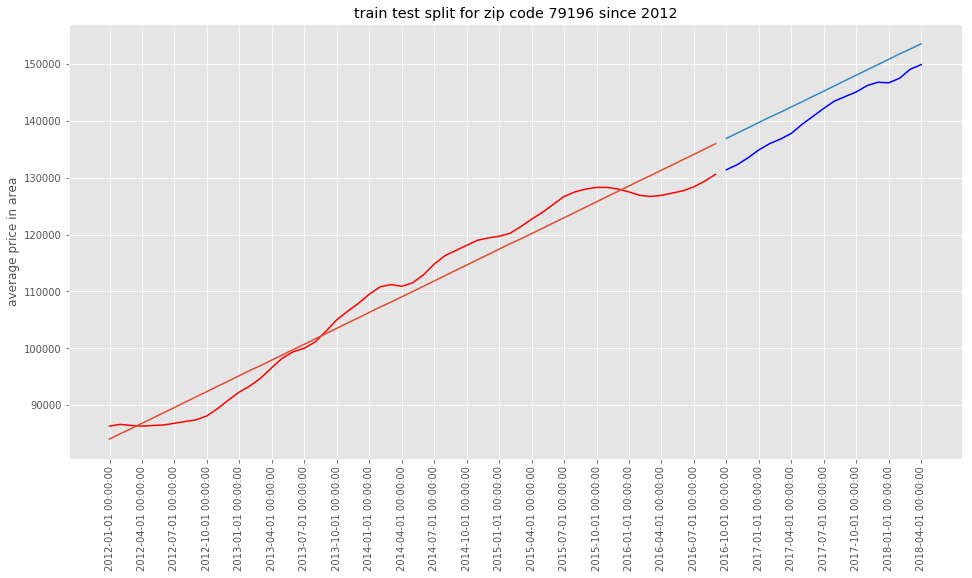

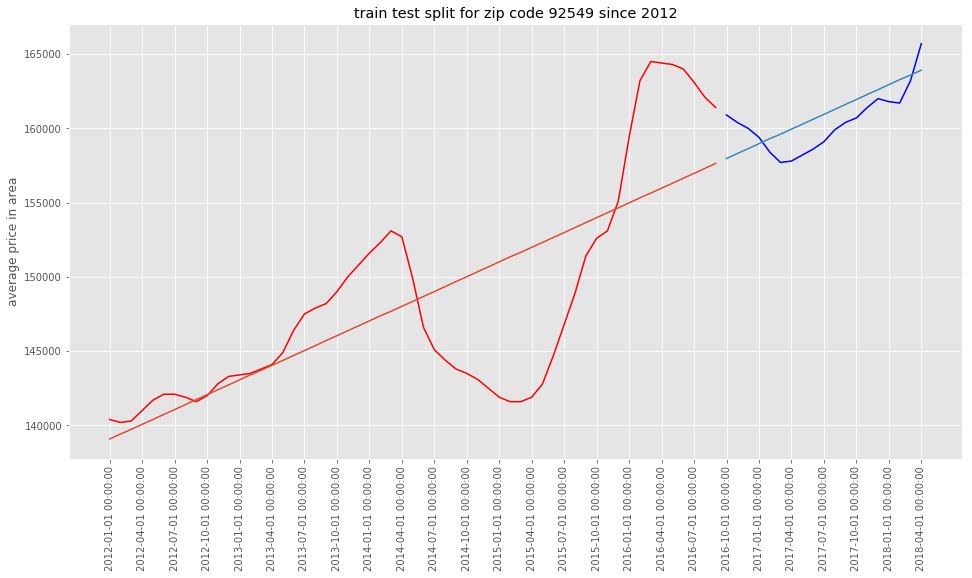

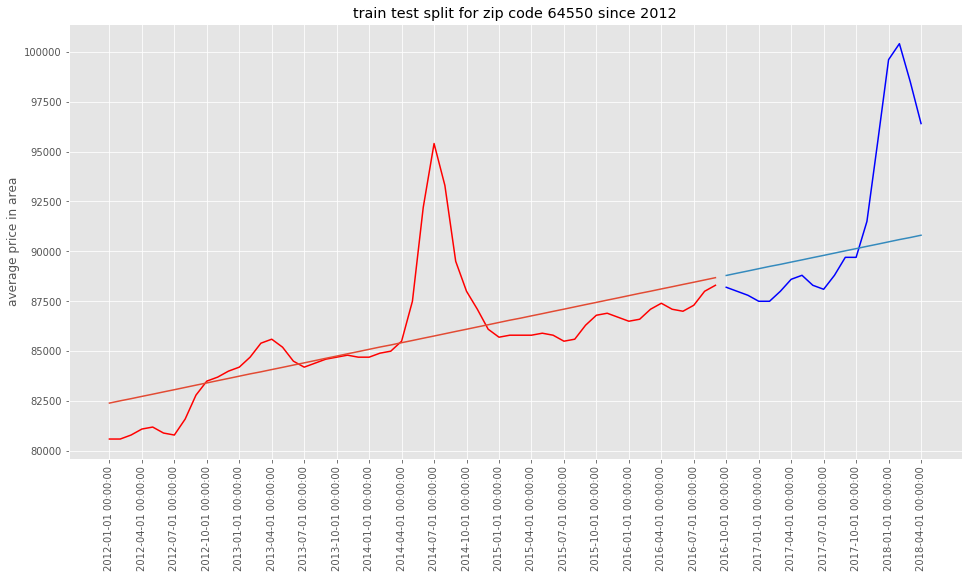

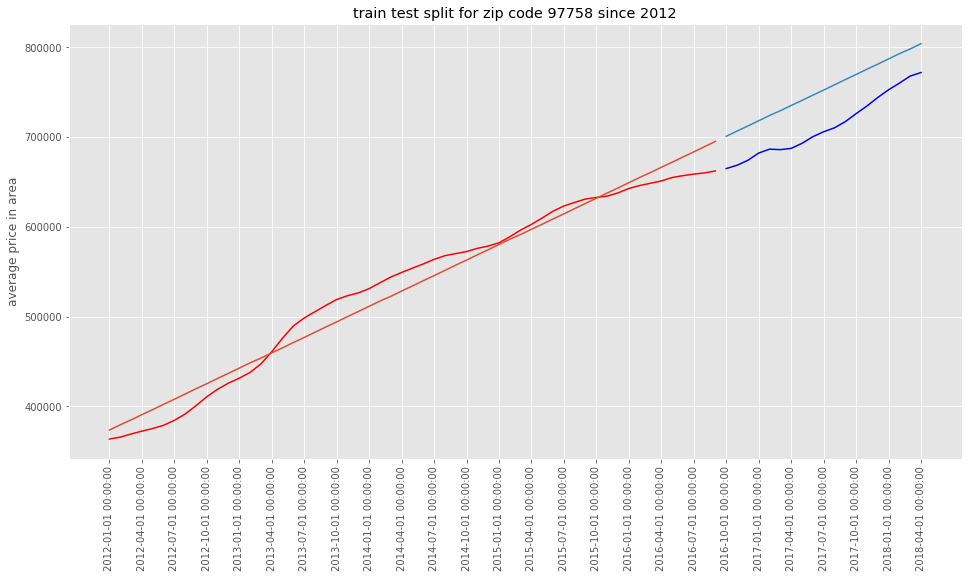

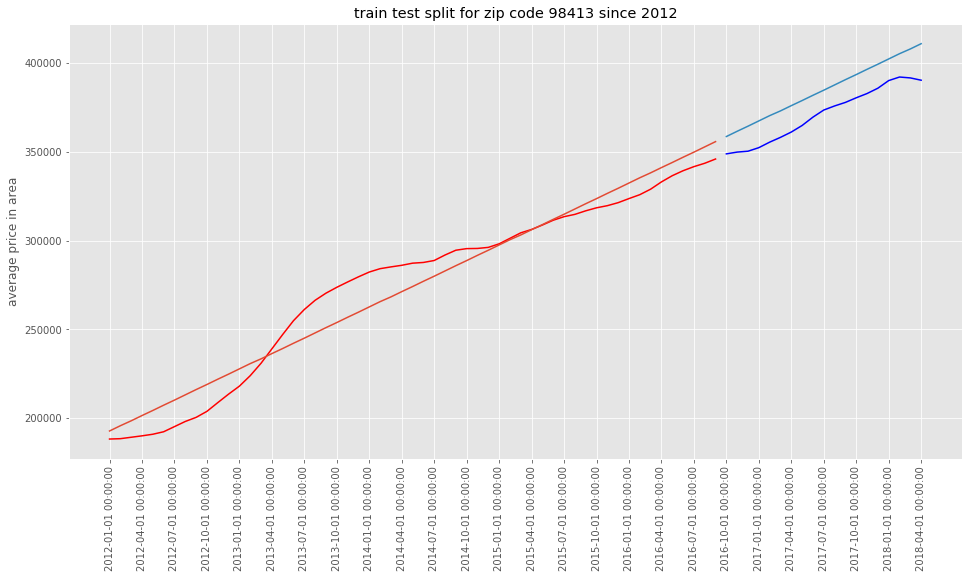

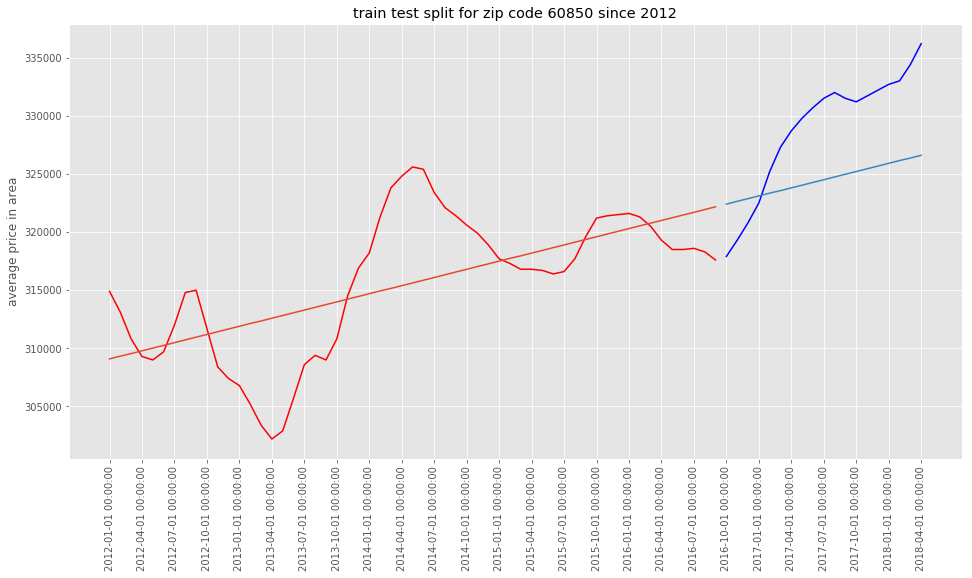

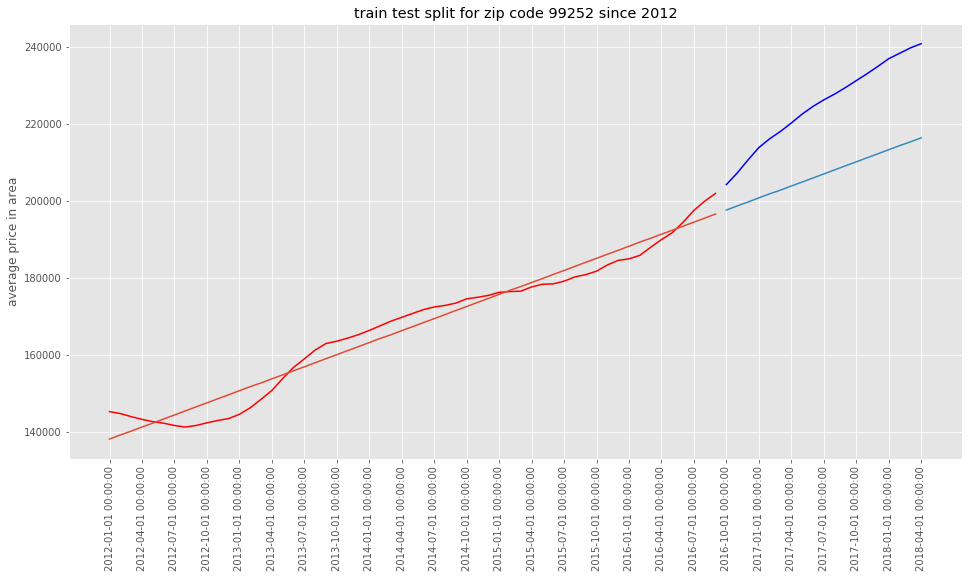

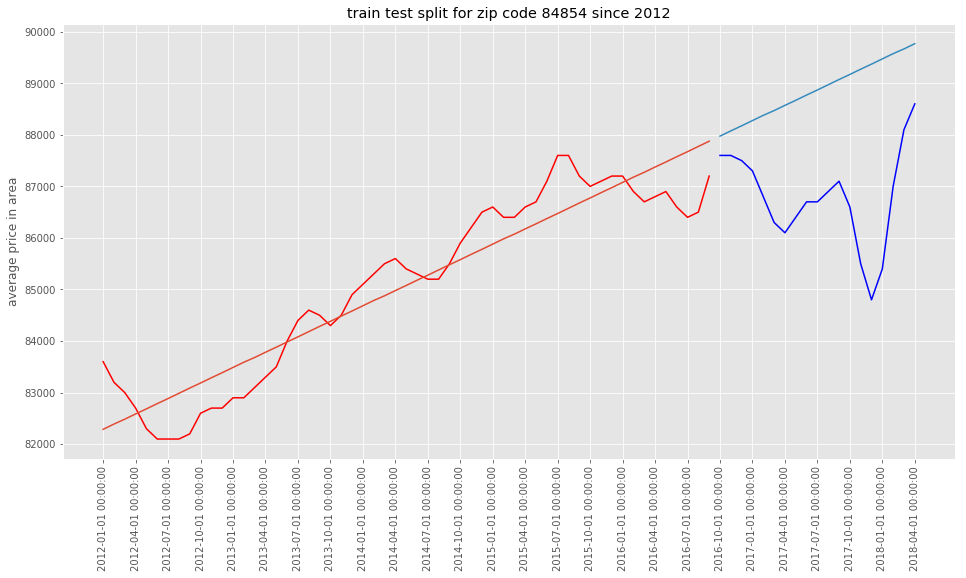

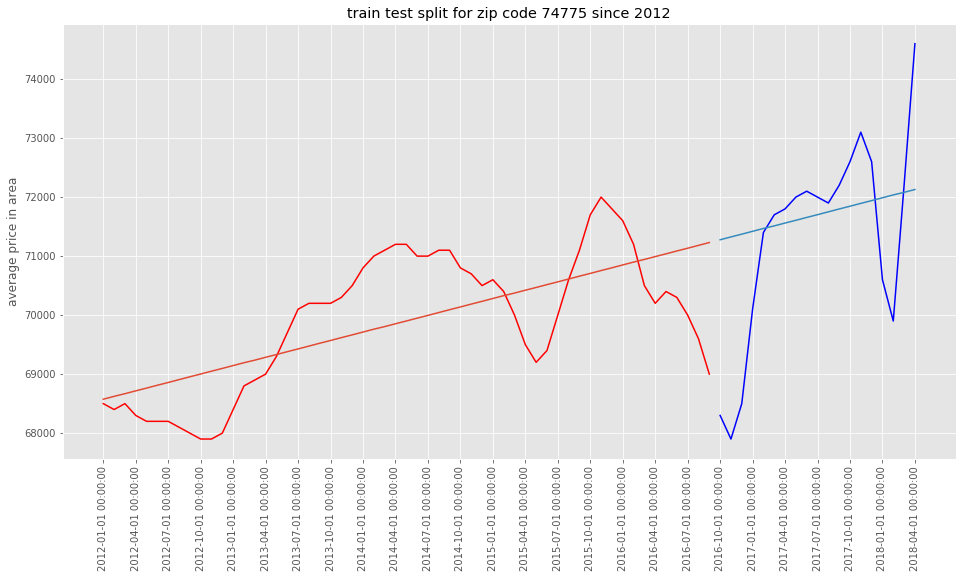

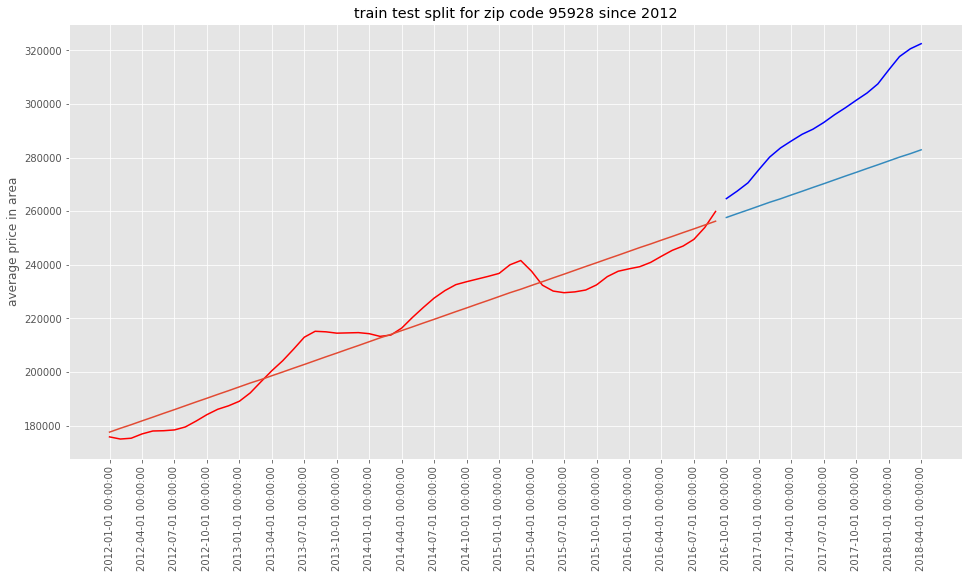

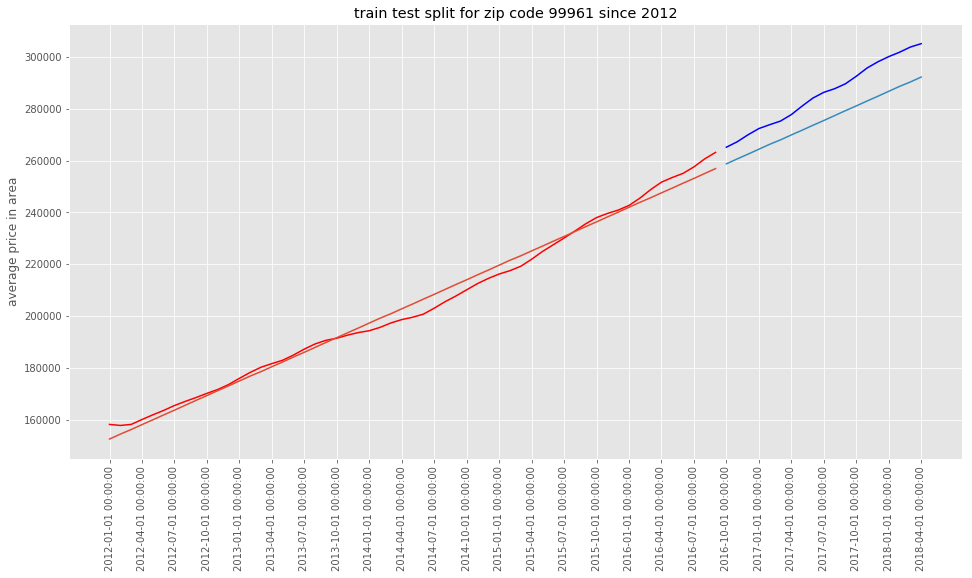

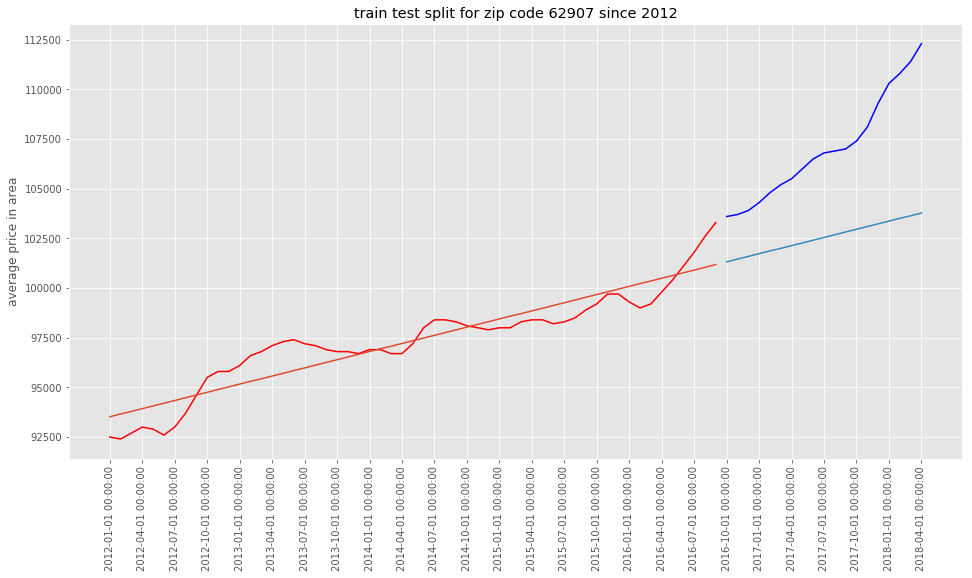

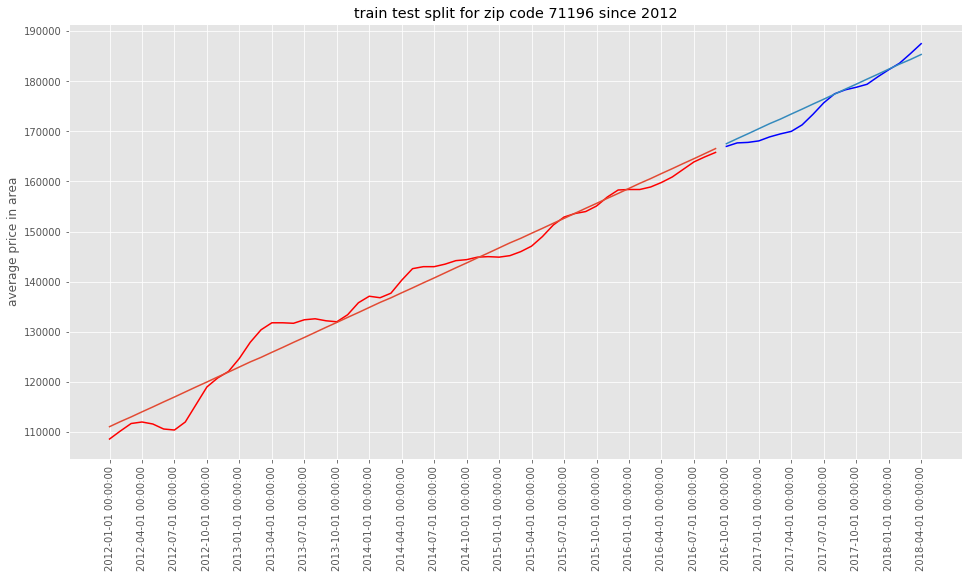

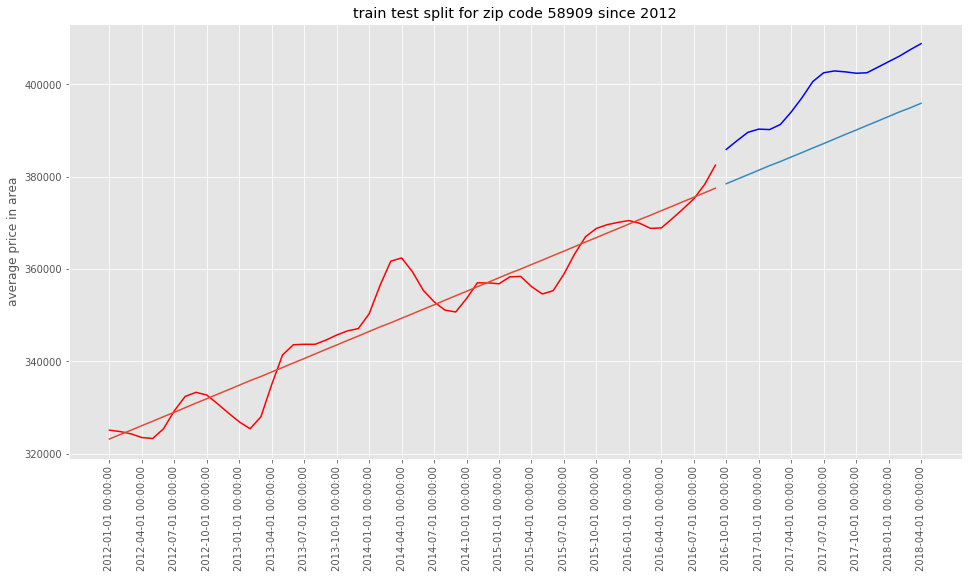

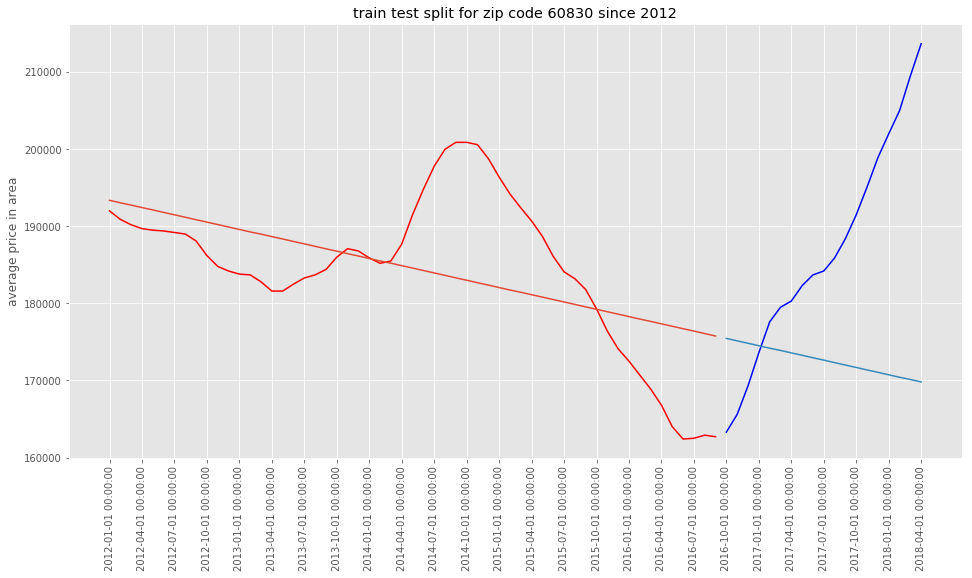

In [65]:
%matplotlib inline
from sklearn import linear_model

lr = linear_model.LinearRegression()
for i in predictable_df_ts:
    plt.figure(figsize=(16, 8))
    train = predictable_df_ts[i][: int(len(predictable_df_ts) * 0.75)].dropna()
    test = predictable_df_ts[i][int(len(predictable_df_ts) * 0.75) :].dropna()
    plt.plot(train, color="red")
    plt.plot(test, color="blue")
    plt.title("train test split for zip code %s since 2012" % i)
    plt.xticks(predictable_df_ts.index[::3], rotation=90)
    plt.ylabel("average price in area")

    posix_dates_train = np.array(list(map(lambda x: to_posix(x), train.index))).reshape(
        -1, 1
    )
    posix_dates_test = np.array(list(map(lambda x: to_posix(x), test.index))).reshape(
        -1, 1
    )

    model = lr.fit(posix_dates_train, train.values)
    train_predictions = lr.predict(posix_dates_train)
    test_predictions = lr.predict(posix_dates_test)

    plt.plot(list(map(lambda x: from_posix(x), posix_dates_train)), train_predictions)
    plt.plot(list(map(lambda x: from_posix(x), posix_dates_test)), test_predictions)